<a href="https://colab.research.google.com/github/Raoufmamedov/Raouf/blob/master/%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание к лекции "Базовые понятия статистики"**

Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

**Задание 1. Загрузка данных**

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения:surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
horses = files.upload() 

Saving horse_data.txt to horse_data.txt


In [ ]:

full_list=['surgery?', 'age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 
                          'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 
                          'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
                          'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume',
                          'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome',
                          'surgical lesion?', '25', '26', '27', 'cp_data']
selection_list=['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']  
full_series=pd.Series(full_list)                
usecols=full_series[full_series.isin(selection_list)]                 

In [ ]:
horse=pd.read_csv('horse_data.txt', header=None, usecols=usecols.index, na_values='?', names=usecols)
horse.head()

,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,37.3,104.0,35.0,NaN,NaN,2.0


В нашем распоряжении данные следующих видов:

1) Номинальные бинарные: surgery?

2) Интервальные: rectal temperature, 	pulse, 	respiratory rate 	

3) Порядковые: temperature of extremities, 	pain. В первом признаке похоже нарушен порядок кодировки (перепутан порядок warm и normal). В таком виде данный признак превращается в категориальный, и должен быть векторизирован. Альтернативно, мы можем сгрупировать классы данного признака и бинаризировать на пары "normal+warm"/"cool+cold". Поскольку уточнения в задании отсутствуют, данный параметр оставлен без изменения.

4) Категориальные: 	outcome (Строго говоря могут быть разбиты на 2 бинарных признака: 'lived' и 'died/'euthanized')

В данном ноутбуке преобразовываем только признак surgery?

In [ ]:
horse['surgery?']=np.where(horse['surgery?']==1, True, False)


In [ ]:
horse.columns

Index(['surgery?', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'pain', 'outcome'],
      dtype='object')


**Задание 2. Первичное изучение данных**

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.


Для начала выясним, насколько связаны между собою наблюдения сгрупированные по исходам. Для этого проанализируем эти подвыборки методом Manova.

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
horses=horse.copy()
horses.columns=horses.columns.str.replace(" ", "")
horses.columns=horses.columns.str.replace("?", "")


<ipython-input-184-3c6c0634aab6>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  horses.columns=horses.columns.str.replace("?", "")


In [ ]:
maov = MANOVA.from_formula('surgery + rectaltemperature + pulse + respiratoryrate  + pain ~ outcome', data=horses.query('outcome!=2'))
print(maov.mv_test())

                                 Multivariate linear model
                                                                                           
-------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF         F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 6.0000 122.0000 30524397474400004.0000 0.0000
         Pillai's trace                1.0000 6.0000 122.0000 30524397474400004.0000 0.0000
 Hotelling-Lawley trace 1501199875790164.2500 6.0000 122.0000 30524397474400004.0000 0.0000
    Roy's greatest root 1501199875790164.2500 6.0000 122.0000 30524397474400004.0000 0.0000
-------------------------------------------------------------------------------------------
                                                                                           
---------------------

In [ ]:
maov = MANOVA.from_formula('surgery + rectaltemperature + pulse + respiratoryrate  + pain ~ outcome', data=horses)
print(maov.mv_test())

                                 Multivariate linear model
                                                                                           
-------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF         F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 6.0000 162.0000 -3039929748475112.0000 1.0000
         Pillai's trace                1.0000 6.0000 162.0000 -3039929748475112.0000 1.0000
 Hotelling-Lawley trace -112589990684263.4062 6.0000 162.0000 -3039929748475111.5000 1.0000
    Roy's greatest root -112589990684263.4062 6.0000 162.0000 -3039929748475112.0000 1.0000
-------------------------------------------------------------------------------------------
                                                                                           
---------------------

In [ ]:
maov = MANOVA.from_formula('surgery + rectaltemperature + pulse + respiratoryrate  + pain ~ outcome', data=horses.query('outcome!=1'))
print(maov.mv_test())

                              Multivariate linear model
                                                                                      
--------------------------------------------------------------------------------------
       Intercept               Value        Num DF  Den DF       F Value        Pr > F
--------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 6.0000 55.0000 607102890944543.0000 0.0000
         Pillai's trace              1.0000 6.0000 55.0000 607102890944543.0000 0.0000
 Hotelling-Lawley trace 66229406284859.2344 6.0000 55.0000 607102890944543.0000 0.0000
    Roy's greatest root 66229406284859.2344 6.0000 55.0000 607102890944543.0000 0.0000
--------------------------------------------------------------------------------------
                                                                                      
--------------------------------------------------------------------------

По данным Pr > F, различия между исходом 1 и исходами 2+3 значимы, а исходы 2 и 3 (умершие и усыплённые) статистически неразличимы (возможно результаты после нормализации данных будут отличаться).

Поэтому, учитывая категориальный характер переменной outcome, мы будем рассматривать данные в разрезе исходов.

Рассмотрим как меняются статистические данные по группам выживаемости/смертности

In [ ]:
statoverview=horse.groupby('outcome').agg(['count','min', 'max', 'mean', 'median']).round(1)
statoverview.T

outcome                              1.0    2.0    3.0
surgery?                   count     178     77     44
                           min     False  False  False
                           max      True   True   True
                           mean      0.5    0.8    0.6
                           median    1.0    1.0    1.0
rectal temperature         count     152     53     34
                           min      36.5   36.0   35.4
                           max      39.9   40.8   40.3
                           mean     38.2   38.2   38.1
                           median   38.2   38.1   38.0
pulse                      count     166     66     43
                           min      30.0   30.0   36.0
                           max     150.0  184.0  140.0
                           mean     63.4   87.2   81.7
                           median   54.0   86.0   82.0
respiratory rate           count     147     58     36
                           min       8.0   12.0   12.0
                           max      96.0   96.0   80.0
                           mean     29.3   33.0   31.1
                           median   24.0   30.0   24.0
temperature of extremities count     146     64     33
                           min       1.0    1.0    1.0
                           max       4.0    4.0    4.0
                           mean      2.0    2.8    2.9
                           median    2.0    3.0    3.0
pain                       count     144     65     35
                           min       1.0    1.0    1.0
                           max       5.0    5.0    5.0
                           mean      2.5    3.7    3.3
                           median    3.0    4.0    3.0

Судя по данным:

1) Хирургическое вмешательство чаще проводилось в случае выживших и усыплённых.

2) Для умерших и усыплённых животных медианное значение пульса значительно выше чем для выживших. Похоже это самый значимо различающийся по значениям признак (необходима дальнейшая проверка).

3) Медианная частота дыхания умерших животных выше чем у выживших и усыплённых.

4) Температура конечностей для выживших животных медианно тёплая, для остальных групп медианно прохладная.

5) Медианная болезненность выше для умерших животный


Для начала определим признаки, в которых содержатся нетипичные значения. Это три интервальные переменные 'rectal temperature', 'pulse', 'respiratory rate'.
Определим выбросы методом Тьюки для каждого исхода, а потом найдём выбросы по полной выборке. 

In [ ]:
  quant_v=1.5 # 
  outcoms=['lived', 'died', 'euthed']
  confdict=dict()
  for i in [0, 1, 2]:
    horse_group= horse[horse.outcome==i+1].describe().round(1).T
    # display(horse_group)
    IQR=horse_group['75%']-horse_group['25%']
    CI_left=horse_group['25%']-quant_v*IQR
    CI_right=horse_group['75%']+quant_v*IQR
    confdict[outcoms[i]]=pd.DataFrame([CI_left, CI_right], index=['left', 'right'])
  lived= confdict['lived']
  died=confdict['died']
  euthed=confdict['euthed']
  display(lived.T, died.T, euthed.T)


,left,right
rectal temperature,36.75,39.55
pulse,12.00,108.00
respiratory rate,-13.25,64.75
temperature of extremities,-2.00,6.00
pain,0.50,4.50
outcome,1.00,1.00


,left,right
rectal temperature,36.05,40.45
pulse,18.75,144.75
respiratory rate,6.00,54.00
temperature of extremities,3.00,3.00
pain,0.00,8.00
outcome,2.00,2.00


,left,right
rectal temperature,35.75,40.15
pulse,0.00,160.00
respiratory rate,-10.00,70.00
temperature of extremities,3.00,3.00
pain,-1.00,7.00
outcome,3.00,3.00


In [ ]:
rt_ci=lived.loc['left':'right', 'rectal temperature']
pulse_ci=lived.loc['left':'right', 'pulse']
rr_ci=lived.loc['left':'right','respiratory rate']
rt_outliers=np.invert(horse.query('outcome==1')['rectal temperature'].between(rt_ci.left, rt_ci.right))
pulse_outliers=np.invert(horse.query('outcome==1')['pulse'].between(pulse_ci.left, pulse_ci.right))
rr_outliers=np.invert(horse.query('outcome==1')['respiratory rate'].between(rr_ci.left, rr_ci.right))

all_feat_ol_lived=(rt_outliers&pulse_outliers&rr_outliers)
print(all_feat_ol_lived.value_counts())
horse.iloc[all_feat_ol_lived[all_feat_ol_lived].index]

False    170
True       8
dtype: int64


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,False,NaN,NaN,NaN,2.0,2.0,1.0
52,False,NaN,NaN,NaN,1.0,1.0,1.0
56,True,NaN,NaN,NaN,NaN,NaN,1.0
160,True,NaN,NaN,NaN,NaN,4.0,1.0
175,True,NaN,NaN,NaN,NaN,NaN,1.0
216,False,NaN,NaN,NaN,NaN,NaN,1.0
227,True,NaN,NaN,NaN,NaN,NaN,1.0
288,True,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# rt_outliers=horse.query('outcome==1')['rectal temperature'].between(rt_ci.left, rt_ci.right) 
# pulse_outliers=horse.query('outcome==1')['pulse'].between(pulse_ci.left, pulse_ci.right)
# rr_outliers=horse.query('outcome==1')['respiratory rate'].between(rr_ci.left, rr_ci.right)

# all_feat_nol_lived=(rt_outliers&pulse_outliers&rr_outliers)
# print(all_feat_nol_lived.value_counts())
# horse.iloc[all_feat_nol_lived[~all_feat_nol_lived].index]

Выбросы по всем трём параметрам у нас наблюдаются в 8 случаях. 

Для выздоровевших лошадей в качестве выбросов найдены только отсутствующие значения. Причина в отсутствии выбросов в измерениях ректальной температуры. повторим проверку без этого признака.

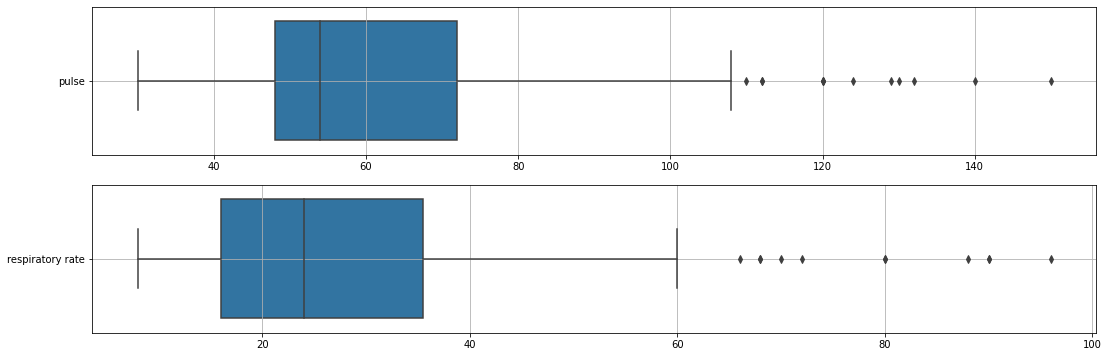

False    164
True      14
dtype: int64


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,False,NaN,NaN,NaN,2.0,2.0,1.0
41,False,39.0,150.0,72.0,NaN,NaN,1.0
52,False,NaN,NaN,NaN,1.0,1.0,1.0
56,True,NaN,NaN,NaN,NaN,NaN,1.0
103,True,38.0,140.0,68.0,1.0,3.0,1.0
126,True,38.7,NaN,NaN,3.0,5.0,1.0
148,True,38.3,132.0,NaN,NaN,2.0,1.0
160,True,NaN,NaN,NaN,NaN,4.0,1.0
175,True,NaN,NaN,NaN,NaN,NaN,1.0
216,False,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
fig,ax=plt.subplots(2, 1,  figsize=(18, 6))
sns.boxplot(data=horse.query('outcome==1')[['pulse']], ax=ax[0], orient = 'h', whis=1.5).grid(True)
sns.boxplot(data=horse.query('outcome==1')[['respiratory rate']], ax=ax[1], orient = 'h').grid(True)
plt.show()
all_feat_ol_lived=(pulse_outliers&rr_outliers)
print(all_feat_ol_lived.value_counts())
horse.iloc[all_feat_ol_lived[all_feat_ol_lived].index]


Для выживших лошадей мы нашли выбросные (по признакам pulse 	respiratory rate) наблюдения №№: 41, 103, 148*, 229, 244.


*-По данным одного лишь признака pulse

Повторим проверку на выбросы для остальных классов лошадиной судьбы

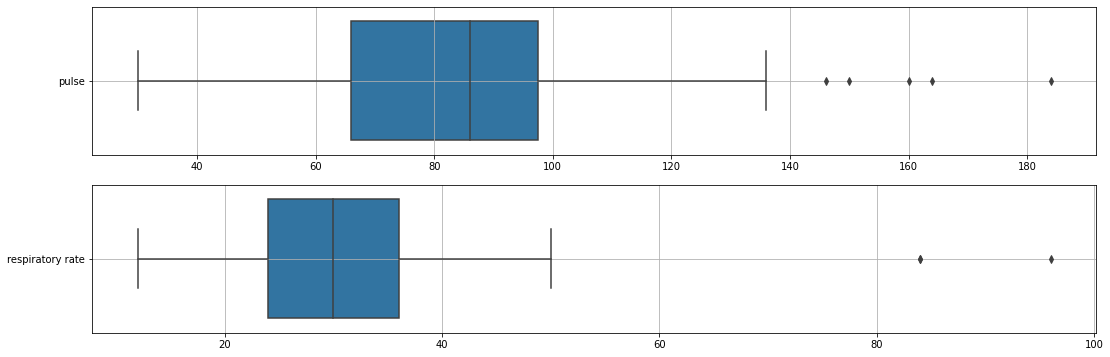

False    66
True     11
dtype: int64


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,True,39.1,164.0,84.0,4.0,2.0,2.0
28,True,NaN,NaN,NaN,NaN,NaN,2.0
39,True,39.2,146.0,96.0,NaN,NaN,2.0
74,True,NaN,NaN,NaN,NaN,NaN,2.0
78,True,NaN,NaN,NaN,3.0,5.0,2.0
93,False,NaN,NaN,NaN,3.0,5.0,2.0
136,True,NaN,NaN,NaN,3.0,5.0,2.0
151,True,39.3,NaN,NaN,4.0,4.0,2.0
174,False,NaN,NaN,NaN,3.0,4.0,2.0
207,True,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
fig,ax=plt.subplots(2, 1,  figsize=(18, 6))
sns.boxplot(data=horse.query('outcome==2')[['pulse']], ax=ax[0], orient = 'h').grid(True)
sns.boxplot(data=horse.query('outcome==2')[['respiratory rate']], ax=ax[1], orient = 'h').grid(True)
plt.show()
rt_ci=died.loc['left':'right', 'rectal temperature']
pulse_ci=died.loc['left':'right', 'pulse']
rr_ci=died.loc['left':'right','respiratory rate']
pulse_outliers=np.invert(horse.query('outcome==2')['pulse'].between(pulse_ci.left, pulse_ci.right))
rr_outliers=np.invert(horse.query('outcome==2')['respiratory rate'].between(rr_ci.left, rr_ci.right))

all_feat_ol_died=(pulse_outliers&rr_outliers)
print(all_feat_ol_died.value_counts())
horse.iloc[all_feat_ol_died[all_feat_ol_died].index]

Для умерших лошадей мы нашли выбросные (по выбранным ранее признакам) наблюдения №№: 3, 39, 255

Для умерщвленных лошадей:


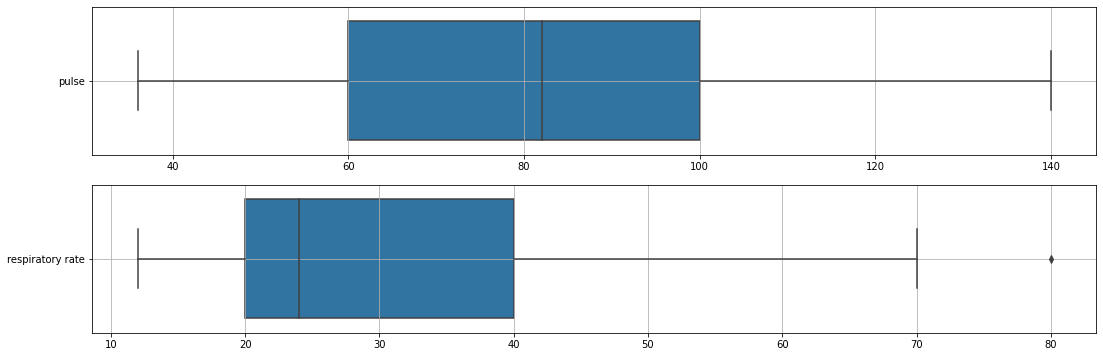

False    43
True      1
dtype: int64


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
117,False,39.5,NaN,NaN,3.0,3.0,3.0


In [ ]:
fig,ax=plt.subplots(2, 1,  figsize=(18, 6))
sns.boxplot(data=horse.query('outcome==3')[['pulse']], ax=ax[0], orient = 'h', whis=1.5).grid(True)
sns.boxplot(data=horse.query('outcome==3')[['respiratory rate']], ax=ax[1], orient = 'h').grid(True)
plt.show()
pulse_ci=euthed.loc['left':'right', 'pulse']
rr_ci=euthed.loc['left':'right','respiratory rate']
pulse_outliers=np.invert(horse.query('outcome==3')['pulse'].between(pulse_ci.left, pulse_ci.right))
rr_outliers=np.invert(horse.query('outcome==3')['respiratory rate'].between(rr_ci.left, rr_ci.right))
all_feat_ol_euthed=(pulse_outliers&rr_outliers)
print(all_feat_ol_euthed.value_counts())
horse.iloc[all_feat_ol_euthed[all_feat_ol_euthed].index]

Для усыплённых лошадей выбросные наблюдения не найдены.

Наконец примененим метод Тьюки к полной выборке

In [ ]:
statoverview=horse.describe().round(1).T
IQR=statoverview['75%']-statoverview['25%']
CI_left=statoverview['25%']-quant_v*IQR
CI_right=statoverview['75%']+quant_v*IQR
conframe=pd.DataFrame([CI_left, CI_right], index=['left', 'right'])
conframe.T

,left,right
rectal temperature,36.75,39.55
pulse,-12.00,148.00
respiratory rate,-7.75,62.25
temperature of extremities,-2.00,6.00
pain,-1.00,7.00
outcome,-0.50,3.50


Рассмотрим полученные результаты. 

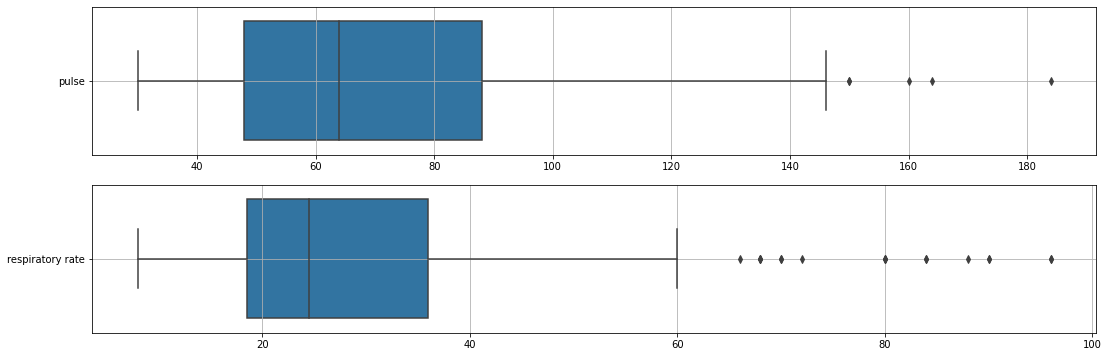

False    279
True      21
dtype: int64


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,True,39.1,164.0,84.0,4.0,2.0,2.0
5,False,NaN,NaN,NaN,2.0,2.0,1.0
28,True,NaN,NaN,NaN,NaN,NaN,2.0
41,False,39.0,150.0,72.0,NaN,NaN,1.0
52,False,NaN,NaN,NaN,1.0,1.0,1.0
56,True,NaN,NaN,NaN,NaN,NaN,1.0
74,True,NaN,NaN,NaN,NaN,NaN,2.0
78,True,NaN,NaN,NaN,3.0,5.0,2.0
93,False,NaN,NaN,NaN,3.0,5.0,2.0
117,False,39.5,NaN,NaN,3.0,3.0,3.0


In [ ]:
fig,ax=plt.subplots(2, 1,  figsize=(18, 6))
sns.boxplot(data=horse[['pulse']], ax=ax[0], orient = 'h', whis=1.5).grid(True)
sns.boxplot(data=horse[['respiratory rate']], ax=ax[1], orient = 'h').grid(True)
plt.show()
pulse_ci=conframe.loc['left':'right', 'pulse']
rr_ci=conframe.loc['left':'right','respiratory rate']

pulse_outliers=np.invert(horse['pulse'].between(pulse_ci.left, pulse_ci.right))
rr_outliers=np.invert(horse['respiratory rate'].between(rr_ci.left, rr_ci.right))

all_feat_ol_conframe=(pulse_outliers&rr_outliers)
print(all_feat_ol_conframe.value_counts())
# horse.iloc[all_feat_ol_conframe[all_feat_ol_conframe]]
horse[all_feat_ol_conframe]

На полной выборке метод Тьюки нашёл всего 3 выбросных значения, это наблюдения № 3, 41, 255.

Итак мы осуществили поиск выбросов на всей выборке и подвыборках сформированных по исходу лечения. Несмотря на то, что большинство найденых на множестве выживших лошадей подозрительных записей укладывается в диапазон характерных значений полной выборки, они могут отражать более тяжёлое протекание болезни которое имело определённые вероятности благополучного и неблагополучного исхода. Если это так, повышенное значение данных показателей могут влиять на прогноз.


**Задание 3. Работа с пропусками**

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
feat_na=horse.isna().sum() # Определяем количество и пропусков по признакам
feat_na_pct=feat_na/horse.shape[1] 
pd.DataFrame([feat_na, feat_na_pct.round(2)],
             index=["Пропуски", "% Пропусков"]).T 

,Пропуски,% Пропусков
surgery?,0.0,0.00
rectal temperature,60.0,8.57
pulse,24.0,3.43
respiratory rate,58.0,8.29
temperature of extremities,56.0,8.00
pain,55.0,7.86
outcome,1.0,0.14


,Кол-во пропусков,Кол-во строк,% строк с пропусками
0,0,155.0,22.14
1,1,77.0,11.00
2,2,46.0,6.57
3,3,12.0,1.71
4,5,8.0,1.14
5,4,2.0,0.29


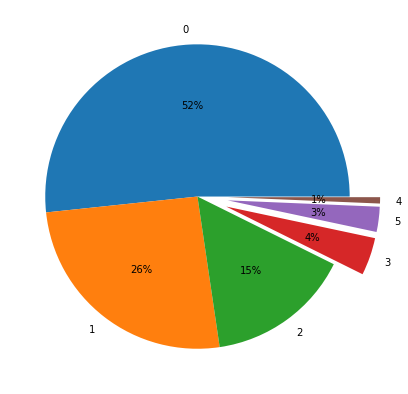

In [ ]:
row_na=horse.iloc[:, horse.columns!='outcome'].isna().T.sum().value_counts(
    dropna=False)  # Определяем количество и процент пропусков по признакам
row_na_pct=row_na/horse.shape[1]
display(pd.DataFrame([row_na, 
              row_na_pct.round(2)],
              index=["Кол-во строк", 
                     "% строк с пропусками"]).T.reset_index()
                     .rename(columns=({'index': "Кол-во пропусков"})))
# display(row_na, row_na_pct)

plt.figure(figsize=[7, 7])
plt.pie(x=row_na, labels=row_na.index, autopct='%1.0f%%', 
        explode=[0, 0, 0, 0.2, 0.2, 0.2])
plt.show()

Лишь половина записей не имеет пропущенных значений, четверть имеет один пропуск и в каждой 6 записи отсутствуют 2 значения. Целесообразность рассмотрения сторк с бОльшим количеством отсутствующих значений признаков под вопросом, а это практически 8% строк датафрейма. Возможным решением является рассмотрение признака surgery? отдельно от остальных, однако 

Посмотрим для каких признаков ситуация неблагоприятная

In [ ]:
horse.loc[horse.isna().sum(axis=1)>=3].count().sort_values()

rectal temperature             2
respiratory rate               2
pulse                          7
pain                           7
temperature of extremities     8
surgery?                      22
outcome                       22
dtype: int64

В 22 строках имеющих 3 и более пропусков лишь в двух случаях имеются значения для признаков rectal temperature и respiratory rate. 

In [ ]:
na_pct_feat=feat_na.sum()/horse.size
print('Всего пропусков по ячейкам датафейма: {}%'.format(round(na_pct_feat*100, 1)))

Всего пропусков по ячейкам датафейма: 12.1%


Рассмотрим полученные результаты. Записи в которых отсутствуют 4 и более признаков, неинформативны и их целесообразно удалить. Также удалим запись с неизвестным исходом. Сделаем это и повторно рассмотрим данные.

In [ ]:
horse=horse.loc[horse.isna().sum(axis=1)<4]
horse=horse[horse.outcome.notna()]
print(horse.isna().sum())
print('\n Количество наблюдений после удаления: {}'.format(horse.shape[0]))

surgery?                       0
rectal temperature            50
pulse                         15
respiratory rate              48
temperature of extremities    46
pain                          46
outcome                        0
dtype: int64

 Количество наблюдений после удаления: 289


Рассмотрим на корреляции признаков в разрезе исходов. Для начала посмотрим какие признаки связаны с исходом лечения, а далее оценим тесноту связи между независимыми признаками в разрезе исхода.

Учитывая наличие среди признаков категориальных и порядковых, для поиска корреляционных зависимостей на всём пространстве признаков мы будем использовать корреляцию Кенделла, а для корреляций между интервальными признаками мы также проведём корреляцию Пирсона. 



In [ ]:
horse.corr(method='kendall').outcome.round(2)

surgery?                      0.14
rectal temperature           -0.06
pulse                         0.29
respiratory rate              0.10
temperature of extremities    0.33
pain                          0.29
outcome                       1.00
Name: outcome, dtype: float64

In [ ]:
horse.groupby('outcome').corr(method="kendall").round(2)

surgery?  rectal temperature  pulse  \
outcome                                                                   
1.0     surgery?                        1.00               -0.06   0.18   
        rectal temperature             -0.06                1.00   0.17   
        pulse                           0.18                0.17   1.00   
        respiratory rate                0.06                0.19   0.36   
        temperature of extremities      0.14                0.07   0.12   
        pain                            0.33               -0.04   0.25   
2.0     surgery?                        1.00                0.03  -0.04   
        rectal temperature              0.03                1.00   0.26   
        pulse                          -0.04                0.26   1.00   
        respiratory rate                0.05                0.12   0.31   
        temperature of extremities     -0.04                0.14   0.29   
        pain                            0.05               -0.18   0.11   
3.0     surgery?                        1.00                0.00  -0.07   
        rectal temperature              0.00                1.00   0.19   
        pulse                          -0.07                0.19   1.00   
        respiratory rate                0.35                0.17   0.18   
        temperature of extremities      0.00                0.16   0.34   
        pain                            0.17               -0.05  -0.11   

                                    respiratory rate  \
outcome                                                
1.0     surgery?                                0.06   
        rectal temperature                      0.19   
        pulse                                   0.36   
        respiratory rate                        1.00   
        temperature of extremities              0.10   
        pain                                    0.14   
2.0     surgery?                                0.05   
        rectal temperature                      0.12   
        pulse                                   0.31   
        respiratory rate                        1.00   
        temperature of extremities              0.03   
        pain                                    0.08   
3.0     surgery?                                0.35   
        rectal temperature                      0.17   
        pulse                                   0.18   
        respiratory rate                        1.00   
        temperature of extremities              0.16   
        pain                                    0.01   

                                    temperature of extremities  pain  
outcome                                                               
1.0     surgery?                                          0.14  0.33  
        rectal temperature                                0.07 -0.04  
        pulse                                             0.12  0.25  
        respiratory rate                                  0.10  0.14  
        temperature of extremities                        1.00  0.19  
        pain                                              0.19  1.00  
2.0     surgery?                                         -0.04  0.05  
        rectal temperature                                0.14 -0.18  
        pulse                                             0.29  0.11  
        respiratory rate                                  0.03  0.08  
        temperature of extremities                        1.00  0.02  
        pain                                              0.02  1.00  
3.0     surgery?                                          0.00  0.17  
        rectal temperature                                0.16 -0.05  
        pulse                                             0.34 -0.11  
        respiratory rate                                  0.16  0.01  
        temperature of extremities                        1.00  0.15  
        pain                                              0.15  1

In [ ]:
horse.groupby('outcome')[['rectal temperature', 'pulse', 'respiratory rate']].corr(method="pearson").round(2)

rectal temperature  pulse  respiratory rate
outcome                                                                
1.0     rectal temperature                1.00   0.22              0.29
        pulse                             0.22   1.00              0.49
        respiratory rate                  0.29   0.49              1.00
2.0     rectal temperature                1.00   0.38              0.27
        pulse                             0.38   1.00              0.60
        respiratory rate                  0.27   0.60              1.00
3.0     rectal temperature                1.00   0.13              0.29
        pulse                             0.13   1.00              0.18
        respiratory rate                  0.29   0.18              1.00

По признакам:

1) **surgery?**: для выживших связь с болевым синдромом (у них видимо был более ярко выражен, поскольку организм по видимому покрепче), для умерщвлённых - с частотой дыхания (возможно неудачный исход операции).

2) **rectal temperature**: корреляция с пульсом для умерших животных и понижением тмпературы конечностей. 

3) **pulse**: высокая корреляция  (высокая) с частотой дыхания, с болезненностью для выживших,а для умерших и умерщвлённых со снижением температуры конечностей (особенно для последних). Таким образом выходит что температура конечностей более информативный признак для прогнозирования исхода. Также, важно снижение корреляции пульса и частоты дыхания в ряду выжившие-умершие-эвтанизированные, по всей видимости снижение за счёт тяжести  состояния. Сочетание этих признаков выглядит перспективно с точки зрения прогнозирования исхода лечения. Для умерших также имеется связь с ректальной температурой. 

Как мы видели ранее, медианные температуры одинаковы для всех исходов, поэтому заменяем медианным значением по всему датасету.

In [ ]:
horse['rectal temperature'].fillna(horse['rectal temperature'].median(), inplace=True)

Мы также видели, что медианный пульс у выживших и погибших животных сильно различается. Заменим отсутствующие значения модальными пульсами для исходов.
То же самое проделаем с иными признаками. Альтернативно, осуществим замены с применением алгоритма MICE

In [ ]:
horse_med=horse.copy()

In [ ]:
horse_med.shape

(289, 7)

In [ ]:
horse_med.pulse=horse_med.groupby("outcome").pulse.transform(lambda x: x.fillna(x.median()))
horse_med['respiratory rate']=horse_med.groupby("outcome")['respiratory rate'].transform(lambda x: x.fillna(x.median()))
horse_med['temperature of extremities']=horse_med.groupby("outcome")['temperature of extremities'].transform(lambda x: x.fillna(x.median()))
horse_med['pain']=horse_med.groupby("outcome")['pain'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

horse_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(horse), columns=horse.columns)

Определим насколько коррелированы наши датасеты после замены отсутствующих значений

In [ ]:
horse_med.reset_index(drop=True).corrwith(horse_mice_imputed.reset_index(drop=True))

surgery?                      1.000000
rectal temperature            1.000000
pulse                         0.994591
respiratory rate              0.978038
temperature of extremities    0.982392
pain                          0.982596
outcome                       1.000000
dtype: float64

In [ ]:
listtodf=[]
for i in range(1, 4):
  listtodf.append(horse_med[horse_med['outcome']==i].reset_index(drop=True).corrwith(horse_mice_imputed[horse_mice_imputed['outcome']==i].reset_index(drop=True)))
df=pd.DataFrame(listtodf).round(3)
df.index.name='outcome'
del df['outcome']
display(df)


,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain
outcome,,,,,,
0,1.0,1.0,0.989,0.987,0.990,0.986
1,1.0,1.0,0.998,0.974,0.959,0.972
2,1.0,1.0,0.999,0.945,0.971,0.976


ЗАКЛЮЧЕНИЕ

Датафрейм содержит достаточно много данных в сравнении с полным объёмом данных в исходном текстовом файле. Между некоторыми признаками имеется достаточно сильная корреляция, однако мультиколлинеарность маловероятна. Вполне ожидаемо подтерждается предположение о том, что во вличнии на выздоровление и летальный исход могут преобладать разные признаки.

Использованы две стратегии замены данных, и какая из них более адекватна задаче необходимо выяснить дополнительно. Также возможно имеет смысл объединить исходы 2 и 3, а естественность смерти животного закодировать отдельно. 




